<a href="https://colab.research.google.com/github/ufukhurriyetoglu/vector-normalization-for-vector-search/blob/main/understanding_effect_of_l2_normalization_on_vector_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding effect of l2_normalization on Vector Search

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

# What is Vector Search ?

## Definition of a Vector

A vector is a list of items, a list of 3 apples, 4 oranges, and 2 strawberries for example.

fruit_vector -> [apple, apple, apple, orange, orange, orange, orange, strawberry, strawberry]





In [2]:
fruit_vector = ["apple", "apple", "apple", "orange", "orange", "orange", "orange", "strawberry", "strawberry"]

Let's transform this vector to count vector of items where each column holds
count of each fruit:

In [3]:
fruit_df = pd.DataFrame([[3, 4, 2]], columns = ["apple", "orange", "strawberry"])

Here the first of the table is the count vector:

In [4]:
fruit_df.iloc[0].to_numpy()

array([3, 4, 2])

# Visualizing Vectors

In [17]:
def two_d_vector_space(reduced_dims):
    colors = ("red", "green", "blue", "orange")
    groups = ("P", "Q", "U", "V")

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # We need to create spines in order to have a centered axis
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Hide part of the border by setting colour to none
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Do not show ticks on both sides of the axis
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Set a limit so there is some room for the points
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

    # Go through each set of points and plot them on a scatter plot
    for data, color, group in zip(reduced_dims, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    plt.title('2D vector space')
    plt.legend(loc=2)
    plt.show()

def vector_space(a, b, c):
    p = np.array(a)
    q = np.array(b)
    v = np.array(c)
    points = np.vstack((p, q, v))
    two_d_vector_space(points)


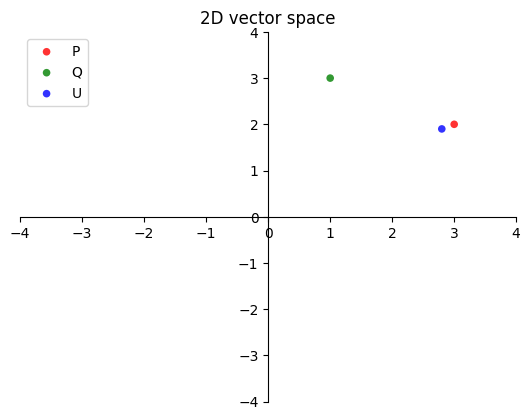

In [18]:
vector_space([3, 2], [1,3], [2.8, 1.9])

## Visualizing three vectors with same unit vector but in different scales (magnitudes)

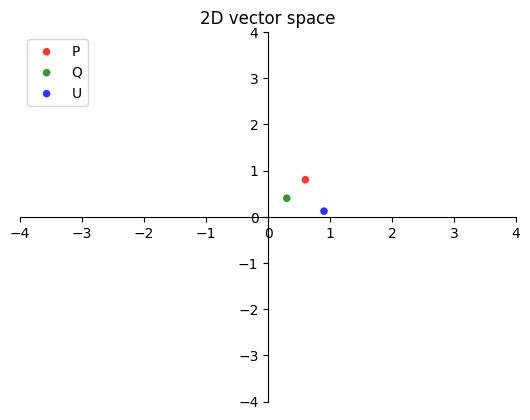

In [20]:
vector_space([0.6, 0.8], [0.3, 0.4], [0.9, 0.12])

# Basics of Vectors

In [23]:
import numpy as np

vector = np.array([0, 1, 2, 3, 4])
magnitude = np.linalg.norm(vector)

print("Magnitude of the vector:", magnitude)

Magnitude of the vector: 5.477225575051661


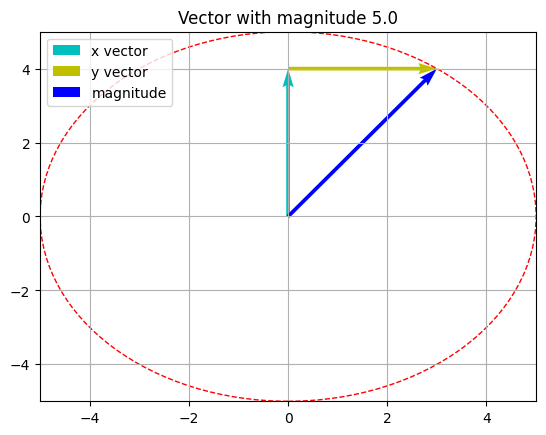

In [48]:
import numpy as np
import matplotlib.pyplot as plt

vector = np.array([3, 4])  # 2D vector

magnitude = np.linalg.norm(vector)

plt.quiver(0, 0,0, 4, angles='xy', scale_units='xy', scale=1, color='c', label='x vector')
plt.quiver(0, 4,3, 0, angles='xy', scale_units='xy', scale=1, color='y', label='y vector')

plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='magnitude')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title(f"Vector with magnitude {magnitude}")

# Add a circle to represent the magnitude
circle = plt.Circle((0, 0), magnitude, fill=False, color='r', linestyle='dashed')
plt.gca().add_patch(circle)

# Add legend
plt.legend(loc="upper left")

# Add grid
plt.grid(True)

plt.show()

Introduction to Unit Vectors
In mathematics and physics, unit vectors play a crucial role in representing and understanding directions and magnitudes. A unit vector is a vector with a length or magnitude of 1. They are often used to describe the direction of other vectors and simplify calculations involving vector quantities.

In this tutorial, we will explore the concept of unit vectors, discuss their properties, and provide examples of how to calculate and visualize unit vectors using the numpy and matplotlib libraries in Python.

Properties of Unit Vectors
Magnitude: A unit vector has a magnitude of 1. This means that its length or Euclidean norm is equal to 1.

Direction: Unit vectors represent the direction of other vectors. They have no specific units associated with them, as their purpose is to convey direction rather than magnitude.

Normalization: To convert a vector into a unit vector, we perform a process called normalization. This involves dividing each component of the vector by its magnitude.

Notation: Unit vectors are typically denoted by adding a caret symbol (^) above the vector symbol. For example, a unit vector in the x-direction is often represented as i^, a unit vector in the y-direction as j^, and a unit vector in the z-direction as k^.

Calculating Unit Vectors with Numpy
To calculate unit vectors using the numpy library in Python, we can utilize the normalization process. Numpy provides a convenient function to compute the Euclidean norm of a vector, which we can use to normalize the vector components.

Here is an example code snippet that demonstrates how to calculate unit vectors using numpy:

In [49]:
import numpy as np

vector = np.array([3, 4])  # Example vector

# Calculate the magnitude of the vector
magnitude = np.linalg.norm(vector)

# Calculate the unit vector
unit_vector = vector / magnitude

# Print the result
print("Unit Vector:", unit_vector)

Unit Vector: [0.6 0.8]



In the code above, we start by defining a vector [3, 4] using numpy's array function. We then calculate the magnitude of the vector using np.linalg.norm. Next, we divide each component of the vector by its magnitude to obtain the unit vector. The resulting unit vector is printed as [0.6, 0.8].

Visualizing Unit Vectors with Matplotlib
To visualize unit vectors, we can use the matplotlib library in Python. Matplotlib provides a variety of plotting functions that allow us to create vector representations.

Here's an example code snippet that demonstrates how to visualize unit vectors using matplotlib:

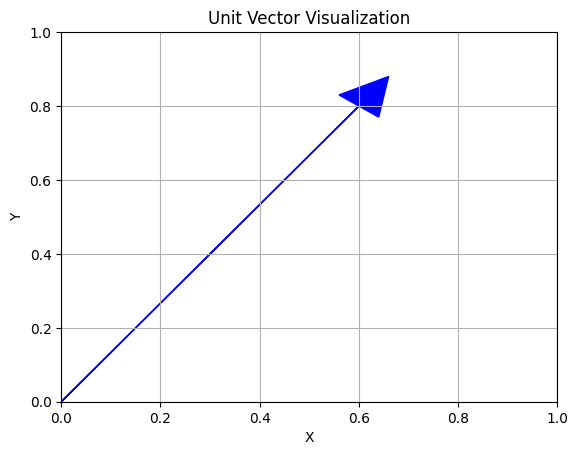

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit vector
unit_vector = np.array([0.6, 0.8])

# Create a plot
fig, ax = plt.subplots()

# Plot the unit vector as an arrow
ax.arrow(0, 0, unit_vector[0], unit_vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')

# Set the limits of the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Unit Vector Visualization")

# Show the plot
plt.grid(True)
plt.show()

The code above will display a plot with an arrow representing the unit vector [0.6, 0.8]. The arrow starts at the origin (0, 0) and extends to the point (0.6, 0.8). The head of the arrow is highlighted with a blue color. The x-axis represents the x dimension, and the y-axis represents the y dimension. The plot has gridlines for better visualization.

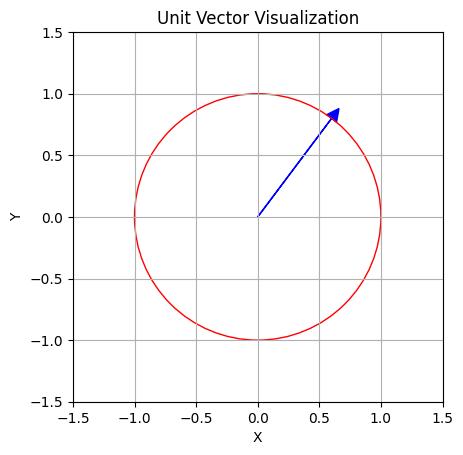

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit vector
unit_vector = np.array([0.6, 0.8])

# Create a plot
fig, ax = plt.subplots()

# Plot the unit vector as an arrow
ax.arrow(0, 0, unit_vector[0], unit_vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')

# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='red', fill=False)
ax.add_patch(circle)

# Set the limits of the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Unit Vector Visualization")

# Add gridlines
ax.grid(True)

# Equal aspect ratio for the plot
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

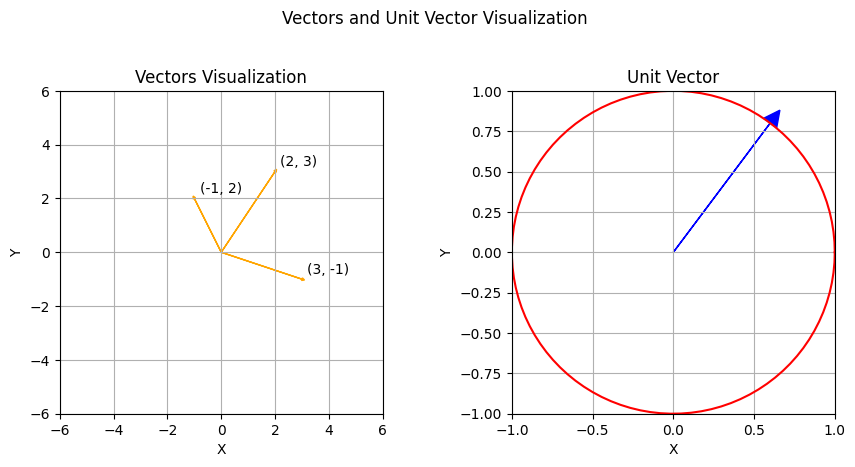

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
vectors = np.array([[2, 3], [-1, 2], [3, -1]])
magnitudes = [4, 2, 3]

# Create a plot with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the vectors in the first subplot
for vector, magnitude in zip(vectors, magnitudes):
    ax1.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='orange', ec='orange')
    ax1.text(vector[0] + 0.2, vector[1] + 0.2, f"({vector[0]}, {vector[1]})", color='black')

ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title("Vectors Visualization")
ax1.grid(True)
ax1.set_aspect('equal', adjustable='box')

# Plot the unit vector as an arrow in the second subplot
unit_vector = np.array([0.6, 0.8])
ax2.arrow(0, 0, unit_vector[0], unit_vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title("Unit Vector")
ax2.grid(True)
ax2.set_aspect('equal', adjustable='box')

# Add the unit circle to the second subplot
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
ax2.plot(x, y, color='red')

# Add a title to the entire figure
fig.suptitle("Vectors and Unit Vector Visualization")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

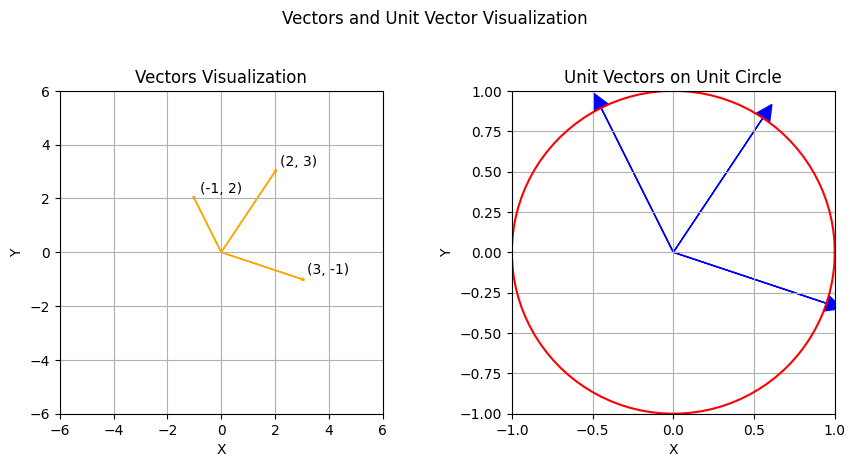

In [54]:

import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(vectors, magnitudes, title):
    # Create a plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the vectors in the first subplot
    for vector, magnitude in zip(vectors, magnitudes):
        ax1.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='orange', ec='orange')
        ax1.text(vector[0] + 0.2, vector[1] + 0.2, f"({vector[0]}, {vector[1]})", color='black')

    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-6, 6)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title("Vectors Visualization")
    ax1.grid(True)
    ax1.set_aspect('equal', adjustable='box')

    # Plot the unit vectors on the unit circle in the second subplot
    unit_vectors = vectors / magnitudes[:, np.newaxis]
    theta = np.linspace(0, 2*np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    ax2.plot(x, y, color='red')
    for vector in unit_vectors:
        ax2.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')

    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title("Unit Vectors on Unit Circle")
    ax2.grid(True)
    ax2.set_aspect('equal', adjustable='box')

    # Add a title to the entire figure
    fig.suptitle(title)

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4)

    # Show the plot
    plt.show()

# Define the vectors
vectors = np.array([[2, 3], [-1, 2], [3, -1]])
magnitudes = np.linalg.norm(vectors, axis=1)

# Plot the vectors with their magnitudes and the unit vector visualization
plot_vectors(vectors, magnitudes, "Vectors and Unit Vector Visualization")

# Vector Similarity

After transforming the available data we will be able to check similarity of different data points
by leveraging the vector similarity approaches. This will enable us to develop recommender systems,
search systems, or help us better understand data features to train better ML models in terms of generalizations
abnd robustness.

## Vector Representation

In real life AI applications, especially considering search applications over unstructured data, first we convert the unstructured data to vector of numeric values, and then index properly to later
search for input queries to find the closest matches.

There are several techniques to vectorize the data lets start with the simplest one which is count vectorization.

## Count Vectorization

Consider the text: `I love text representations because they make vector search possible and more efficient. How lucky I am :)`


In [22]:

docs = [
    "The car skidded to stop for the deer that stood frozen in the headlights of the car.",
    "The vehicle slid and came to a halt in response to the deer's immobility under the car's headlights.",
    "As the car lost traction, it slid across the road and eventually halted abruptly, its brakes screeching, due to the presence of a motionless deer standing in the direct path of its headlights.",
    "The car skidded and stopped for the frozen deer in its headlights.",
    "The car skidded to a standstill for the deer that remained motionless in the car's headlights.",
    "The car skidded and stopped to avoid the motionless deer illuminated by its headlights.",
    "Having finished his PhD at 16, the boy genius  contemplated the challenges the world faced, and intuited that science must be the solution.",
    "After completing his PhD at the age of 16, the exceptionally talented young prodigy reflected on the global challenges and recognized science as the answer.",
    "Having successfully obtained his PhD at the remarkably young age of 16, the boy genius engaged in deep contemplation of the complex issues faced by the world. His intuition led him to firmly believe that science held the key to addressing these challenges, further fueling his dedication to scientific pursuits.",
    "The boy genius finished his PhD at 16 and believed science was the solution to the world's challenges.",
    "Having completed his doctorate at 16, the exceptionally gifted young prodigy pondered the difficulties confronting the world, intuitively perceiving science as the remedy.",
    "The 16-year-old genius, having earned a PhD, contemplated global challenges and recognized science as the solution.",
    "The Frozen Deer was a popular store in the mountain town that sold supplies for hikers and mountain bikers.",
    "The scientific article explains what causes animals to freeze staring into the headlights of speeding vehicles causing many deaths and accidents every year.",
    "A record cold winter followed the drought. Many malnourished deer froze to death in the region.",
    "The ice cream shop sold the Frozen Dear, a treat that became an inseparable and endearing part of the town’s high school dating.",
    "The hunter proceeded to cut, clean, and freeze the deer. The hunter was lucky to get the deer, as his food supplies for the winter were running low.",
    "The driver's negligence resulted in a tragic car crash.",
    "Poor road conditions contributed to the accident.",
    "The collision caused significant damage to both vehicles.",
    "Speeding led to a fatal car accident on the highway.",
    "The driver's distraction caused a rear-end collision.",
    "The car skidded on the icy road, causing a collision with a tree.",
    "Drunk driving resulted in a serious car wreck.",
    "A sudden brake failure caused the car to crash into a building.",
    "The driver lost control of the vehicle, causing a rollover accident.",
    "Reckless overtaking led to a head-on collision.",
    "The invention of the telephone revolutionized communication.",
    "The discovery of penicillin transformed medicine.",
    "The invention of the light bulb revolutionized modern society.",
    "The invention of the computer paved the way for the digital age.",
    "The discovery of DNA's structure laid the foundation for genetic research.",
    "The invention of the internet connected the world like never before.",
    "The development of vaccines saved millions of lives.",
    "The invention of the automobile changed transportation forever.",
    "The discovery of X-rays revolutionized medical imaging.",
    "The invention of the printing press transformed the spread of knowledge.",
    "The deer gracefully leaped over the fence.",
    "The deer cautiously approached the forest clearing.",
    "The majestic deer stood still, observing its surroundings.",
    "The deer nibbled on the lush grass by the stream.",
    "The deer's antlers glistened in the sunlight.",
    "The startled deer quickly darted into the dense forest.",
    "The deer bounded effortlessly through the meadow.",
    "The doe gently nuzzled her fawn in a tender display of affection.",
    "The deer cautiously crossed the road, looking out for oncoming vehicles.",
    "The hunter patiently waited for a deer to appear within range.",
    "Climate change poses a grave threat to our planet.",
    "Poverty remains a persistent challenge in many regions.",
    "Access to clean water is a pressing global issue.",
    "Political instability continues to disrupt nations worldwide.",
    "The fight against inequality and social injustice persists.",
    "The threat of terrorism looms large in many countries.",
    "Cybersecurity breaches pose a significant challenge in the digital age.",
    "Food security remains a critical concern for many communities.",
    "The global pandemic has exposed vulnerabilities in healthcare systems.",
    "Finding sustainable energy solutions is crucial for a greener future.",
    ]